<a href="https://colab.research.google.com/github/Anudeeprao1/Out-paint-the-image/blob/main/image_outpaint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers torch matplotlib pillow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 18.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [ ]:
# Import necessary libraries
from google.colab import files
from PIL import Image , ImageFilter
import numpy as np
from diffusers import StableDiffusionInpaintPipeline
import torch
import matplotlib.pyplot as plt
from IPython.display import display


In [ ]:
# Function to upload an image
def upload_image():
    uploaded = files.upload()
    for filename in uploaded.keys():
        return filename


In [ ]:
# Function to display an image
def display_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

In [ ]:
# Load and prepare the image
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")
    return image

In [ ]:
# Create a feathered mask
def create_feathered_mask(image, feather_radius=10):
    new_width, new_height = image.width + 256, image.height + 256
    mask = np.zeros((new_height, new_width), dtype=np.uint8)

    # Define the bands
    mask[:128, :] = 1  # Top band
    mask[-128:, :] = 1  # Bottom band
    mask[:, :128] = 1  # Left band
    mask[:, -128:] = 1  # Right band

    # Create a PIL mask and apply a Gaussian blur for feathering
    mask_image = Image.fromarray(mask * 255)
    mask_image = mask_image.filter(ImageFilter.GaussianBlur(radius=feather_radius))
    return mask_image

In [ ]:
# Outpaint the image
def outpaint_image(image):
    # Define the dimensions for the new image
    new_width, new_height = image.width + 256, image.height + 256

    # Create a new blank image with added dimensions
    new_image = Image.new("RGB", (new_width, new_height))
    new_image.paste(image, (128, 128))

    # Generate the feathered mask for the inpainting process
    mask_image = create_feathered_mask(image)

    # Load the pre-trained diffusion model
    model = StableDiffusionInpaintPipeline.from_pretrained("runwayml/stable-diffusion-inpainting")
    model.to("cuda" if torch.cuda.is_available() else "cpu")

    # Perform outpainting
    with torch.no_grad():
        output = model(prompt="extend the image", image=new_image, mask_image=mask_image, num_inference_steps=75, guidance_scale=7.5)

    # The output is a PIL image, so we can directly use it
    outpainted_image = output.images[0]

    return outpainted_image


In [ ]:
# Main function
def main():
    print("Upload an image to outpaint:")
    image_path = upload_image()
    image = load_image(image_path)

    print("Original Image:")
    display_image(image)

    outpainted_image = outpaint_image(image)

    print("Outpainted Image:")
    display_image(outpainted_image)

    # Save the outpainted image
    outpainted_image.save("outpainted_image.png")
    files.download("outpainted_image.png")



Upload an image to outpaint:


Saving assignment.jpg to assignment (5).jpg
Original Image:


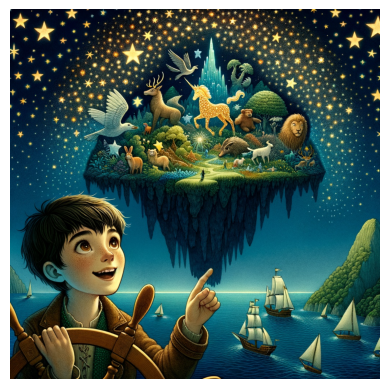

safety_checker/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/51388a731f57604945fddd703ecb5c50e8e7b49d/unet: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/51388a731f57604945fddd703ecb5c50e8e7b49d/unet.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.
An error occurred while trying to fetch /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/51388a731f57604945fddd703ecb5c50e8e7b49d/vae: Error no file named diffusion_pytorch_model.safetensors found in directory /root/.cache/huggingface/hub/models--runwayml--stable-diffusion-inpainting/snapshots/51388a731f57604945fddd703ecb5c50e8e7b49d/vae.
Defaulting to unsafe serialization. Pass `allow_pickle=False` to raise an error instead.


  0%|          | 0/75 [00:00<?, ?it/s]

Outpainted Image:


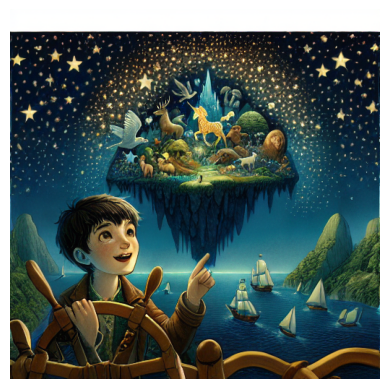

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Run the main function
main()